# CNN for Binary Image Classification

## Imports

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.16.2'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing dataset from Kaggle

In [5]:
# installing kaggle API
%pip install -q kaggle

Note: you may need to restart the kernel to use updated packages.


In [7]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [8]:
# import api key
! mv ~/Downloads/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# list of datasets
! kaggle datasets list

ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          28216        501  1.0              
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000           4247         63  1.0              
orvile/health-and-sleep-relation-2024                        Health and Sleep relation                                  2666  2025-05-08 12:35:19.687000           1764         33  1.0              
omniamahmo

In [12]:
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
  0%|                                                | 0.00/218M [00:00<?, ?B/s]
100%|████████████████████████████████████████| 218M/218M [00:00<00:00, 3.24GB/s]


In [13]:
# unzipping the dataset
! unzip -q /Users/farzam/Desktop/IT/ml/practice/cat-and-dog.zip

## building the model

In [30]:
model_1 = tf.keras.models.Sequential([
    # conv block 1
    # input layer (hidden layer 1)
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    # hidden layer 2
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.25),

    # conv block 2
    # hidden layer 3
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    # hidden layer 4
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(), # Flatten layer
    tf.keras.layers.Dense(256, activation='relu'), # Dense layer 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Dense (Output) layer 2
])


In [31]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model_2 = tf.keras.models.Sequential([
    # conv block 1
    # input layer (hidden layer 1)
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    # hidden layer 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(), # Flatten layer
    tf.keras.layers.Dense(128, activation='relu'), # Dense layer 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Dense (Output) layer 2
])


In [33]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting CNN to images

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
training_data_dir ='/Users/farzam/Desktop/IT/ml/practice/training_set/training_set'
test_data_dir = '/Users/farzam/Desktop/IT/ml/practice/test_set/test_set'

In [36]:
# rescale images
datagen = ImageDataGenerator(rescale=1./255)

In [37]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32),
                                           classes=['dogs', 'cats'], class_mode = 'binary',
                                           batch_size = 20)

Found 8005 images belonging to 2 classes.


In [38]:
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32),
                                           classes=['dogs', 'cats'], class_mode = 'binary',
                                           batch_size = 20)

Found 2023 images belonging to 2 classes.


In [39]:
model_2.fit(training_set, epochs=25, validation_data=test_set)

Epoch 1/25


2025-05-21 12:48:30.978133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


401/401 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.5950 - loss: 0.8798 - val_accuracy: 0.5502 - val_loss: 0.7662
Epoch 2/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6628 - loss: 0.6416 - val_accuracy: 0.6995 - val_loss: 0.5844
Epoch 3/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.7139 - loss: 0.5658 - val_accuracy: 0.7336 - val_loss: 0.5452
Epoch 4/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.7447 - loss: 0.5199 - val_accuracy: 0.6026 - val_loss: 0.8238
Epoch 5/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.7511 - loss: 0.5009 - val_accuracy: 0.7202 - val_loss: 0.5918
Epoch 6/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7767 - loss: 0.4677 - val_accuracy: 0.6639 - val_loss: 0.7208
Epoch 7/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7832 - loss: 0.4566 - val_accuracy: 0.7627 - val_loss: 0.5106
Epoch 8/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8040 - loss: 0.4284 - val_accurac

In [40]:
model_1.fit(training_set, epochs=25, validation_data=test_set)

Epoch 1/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.5758 - loss: 0.8947 - val_accuracy: 0.6031 - val_loss: 0.6644
Epoch 2/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.6634 - loss: 0.6328 - val_accuracy: 0.6174 - val_loss: 0.6639
Epoch 3/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.7326 - loss: 0.5349 - val_accuracy: 0.6396 - val_loss: 0.6857
Epoch 4/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.7686 - loss: 0.4891 - val_accuracy: 0.7415 - val_loss: 0.5402
Epoch 5/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.7989 - loss: 0.4323 - val_accuracy: 0.7271 - val_loss: 0.5218
Epoch 6/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8269 - loss: 0.3904 - val_accuracy: 0.7731 - val_loss: 0.4817
Epoch 7/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8456 - loss: 0.3549 - val_accuracy: 0.7158 - val_loss: 0.6193
Epoch 8/25
401/401 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8587 - loss: 0.3196 - 

## experimenting with the models 

In [43]:
# Model 1: Deeper Structure with Increasing Filters (the one you called 'model_1')
model_1 = tf.keras.models.Sequential([
    # conv block 1
    # input layer (hidden layer 1)
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    # hidden layer 2
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.25),

    # conv block 2
    # hidden layer 3
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    # hidden layer 4
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(), # Flatten layer
    tf.keras.layers.Dense(256, activation='relu'), # Dense layer 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Dense (Output) layer 2
])


In [44]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary() 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,227,393 (4.68 MB)

 Trainable params: 1,225,473 (4.67 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [45]:
# Model 2: Less Heavy Structure (the one you called 'model_2')
model_2 = tf.keras.models.Sequential([
    # conv block 1
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    # hidden layer 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])



In [46]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary() # Good to see the layer and parameter count

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564,289 (2.15 MB)

 Trainable params: 563,777 (2.15 MB)

 Non-trainable params: 512 (2.00 KB)

In [47]:
## Fitting CNN to images with Data Augmentation and Callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [51]:
# --- 1. Setup ImageDataGenerator for Training Data (with Augmentation) ---
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,         # Apply shear mapping
    zoom_range=0.2,          # Randomly zoom in/out
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Strategy for filling in new pixels created by transformations
)
# --- 2. Setup ImageDataGenerator for Validation/Test Data (only Rescaling) ---
test_datagen = ImageDataGenerator(rescale=1./255) # Only rescale, no augmentation for validation/test

# --- 3. Define Callbacks ---
callbacks = [
    # Stop training if validation loss doesn't improve for 'patience' epochs
    EarlyStopping(
        monitor='val_loss',     # Metric to monitor
        patience=10,            # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True, # Restores model weights from the epoch with the best monitored value
        verbose=1               # Prints messages when stopping
    ),
    # Reduce learning rate when a metric has stopped improving
    ReduceLROnPlateau(
        monitor='val_loss',     # Metric to monitor
        factor=0.2,             # Factor by which the learning rate will be reduced. new_lr = lr * factor
        patience=5,             # Number of epochs with no improvement after which learning rate will be reduced
        min_lr=0.00001,         # Lower bound on the learning rate
        verbose=1               # Prints messages when reducing LR
    )
]
# --- 4. Prepare Data Generators for model_2 ---
print("\n--- Preparing generators for Model 2 ---")
training_set_m2 = train_datagen.flow_from_directory(
    directory=training_data_dir,
    target_size=(32,32),
    classes=['dogs', 'cats'], # Explicitly list classes for order consistency
    class_mode = 'binary',    # For binary classification (0 or 1)
    batch_size = 32,          # Increased batch size for potentially faster and more stable training
    shuffle=True              # Shuffle training data each epoch
)
test_set_m2 = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(32,32),
    classes=['dogs', 'cats'],
    class_mode = 'binary',
    batch_size = 32,
    shuffle=False             # DO NOT shuffle validation/test data for consistent evaluation
)


--- Preparing generators for Model 2 ---
Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [52]:
# --- 5. Fit Model 2 ---
print("\n--- Training Model 2 ---")
history_m2 = model_2.fit(
    training_set_m2,
    epochs=50, # Set a higher number of epochs, EarlyStopping will stop it when needed
    validation_data=test_set_m2,
    callbacks=callbacks
)


--- Training Model 2 ---
Epoch 1/50


/Users/farzam/Desktop/IT/ml/practice/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.5576 - loss: 0.9204 - val_accuracy: 0.6080 - val_loss: 0.6629 - learning_rate: 0.0010
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6100 - loss: 0.7151 - val_accuracy: 0.6678 - val_loss: 0.6166 - learning_rate: 0.0010
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6360 - loss: 0.6634 - val_accuracy: 0.5843 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6419 - loss: 0.6381 - val_accuracy: 0.6050 - val_loss: 0.6709 - learning_rate: 0.0010
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6558 - loss: 0.6230 - val_accuracy: 0.5205 - val_loss: 1.2616 - learning_rate: 0.0010
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6654 - loss: 0.6143 - val_accuracy: 0.6525 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 7/50
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6788 - loss: 0.6055
Epoch

In [53]:
# --- 6. Prepare Data Generators for model_1 (Re-instantiate for clean state) ---
print("\n--- Preparing generators for Model 1 ---")
training_set_m1 = train_datagen.flow_from_directory(
    directory=training_data_dir,
    target_size=(32,32),
    classes=['dogs', 'cats'],
    class_mode = 'binary',
    batch_size = 32,
    shuffle=True
)

test_set_m1 = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(32,32),
    classes=['dogs', 'cats'],
    class_mode = 'binary',
    batch_size = 32,
    shuffle=False
)


--- Preparing generators for Model 1 ---
Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [54]:
# --- 7. Fit Model 1 ---
print("\n--- Training Model 1 ---")
history_m1 = model_1.fit(
    training_set_m1,
    epochs=50, # Set a higher number of epochs, EarlyStopping will stop it when needed
    validation_data=test_set_m1,
    callbacks=callbacks
)


--- Training Model 1 ---
Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.5597 - loss: 0.9080 - val_accuracy: 0.5744 - val_loss: 0.6790 - learning_rate: 0.0010
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.6147 - loss: 0.7034 - val_accuracy: 0.6184 - val_loss: 0.6382 - learning_rate: 0.0010
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.6547 - loss: 0.6362 - val_accuracy: 0.5734 - val_loss: 0.7573 - learning_rate: 0.0010
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.6662 - loss: 0.6146 - val_accuracy: 0.6728 - val_loss: 0.6023 - learning_rate: 0.0010
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.6805 - loss: 0.5997 - val_accuracy: 0.5284 - val_loss: 1.0120 - learning_rate: 0.0010
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.6997 - loss: 0.5774 - val_accuracy: 0.7187 - val_loss: 0.5684 - learning_rate: 0.0010
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/s

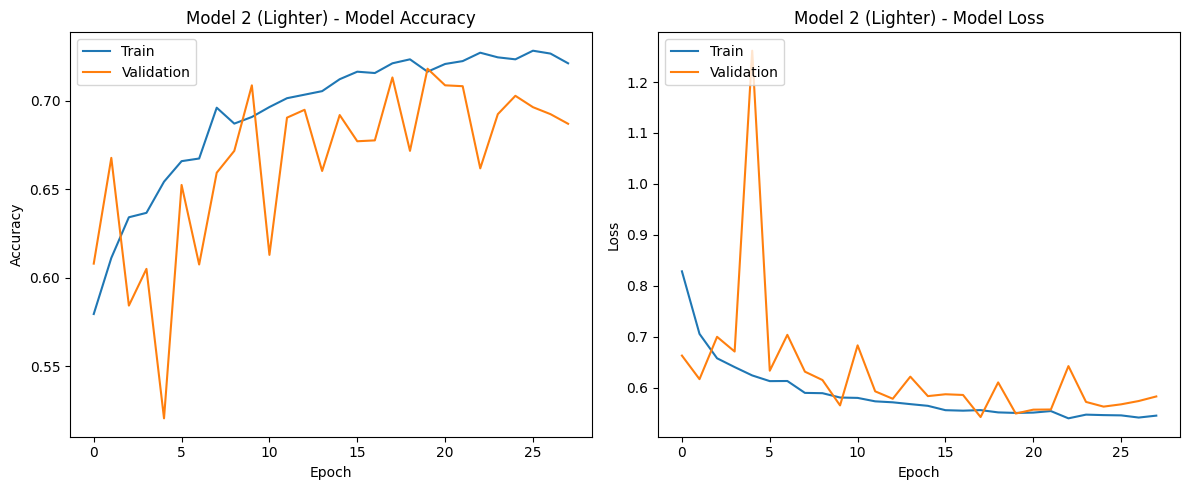

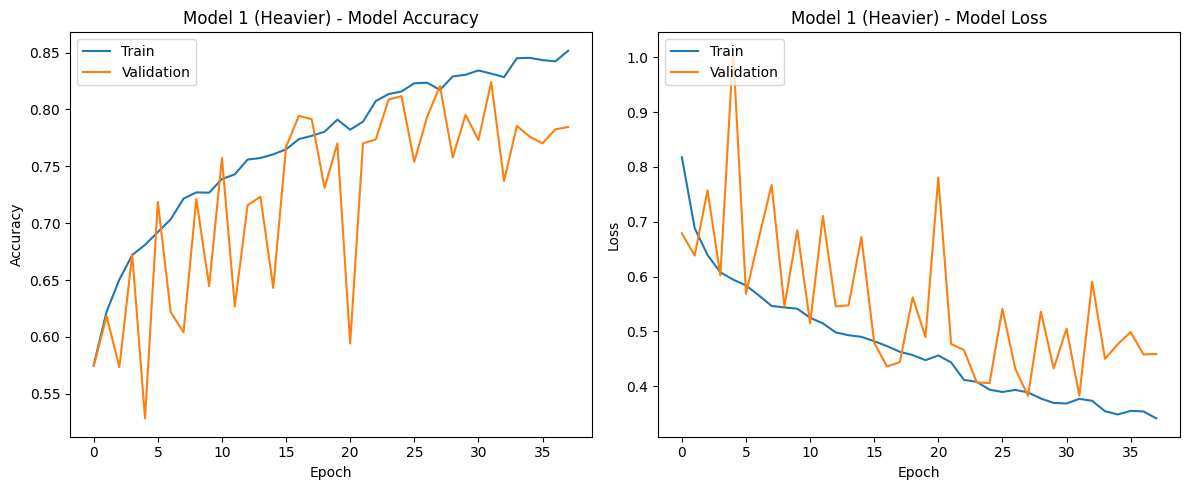

In [55]:
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()

# After training, call the plotting function
plot_training_history(history_m2, 'Model 2 (Lighter)')
plot_training_history(history_m1, 'Model 1 (Heavier)')


## evaluation

In [57]:
print("\n--- Evaluating Model 1 on Test Set ---")
loss_m1, accuracy_m1 = model_1.evaluate(test_set_m1)
print(f"Model 1 Test Loss: {loss_m1:.4f}")
print(f"Model 1 Test Accuracy: {accuracy_m1:.4f}")

print("\n--- Evaluating Model 2 on Test Set ---")
loss_m2, accuracy_m2 = model_2.evaluate(test_set_m2)
print(f"Model 2 Test Loss: {loss_m2:.4f}")
print(f"Model 2 Test Accuracy: {accuracy_m2:.4f}")


--- Evaluating Model 1 on Test Set ---
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8750 - loss: 0.2880
Model 1 Test Loss: 0.3824
Model 1 Test Accuracy: 0.8206

--- Evaluating Model 2 on Test Set ---
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7955 - loss: 0.4157
Model 2 Test Loss: 0.5422
Model 2 Test Accuracy: 0.7133



--- Generating Predictions for Model 1 ---
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

Classification Report for Model 1:
              precision    recall  f1-score   support

        dogs       0.78      0.89      0.83      1012
        cats       0.88      0.75      0.81      1011

    accuracy                           0.82      2023
   macro avg       0.83      0.82      0.82      2023
weighted avg       0.83      0.82      0.82      2023


Confusion Matrix for Model 1:
[[904 108]
 [255 756]]


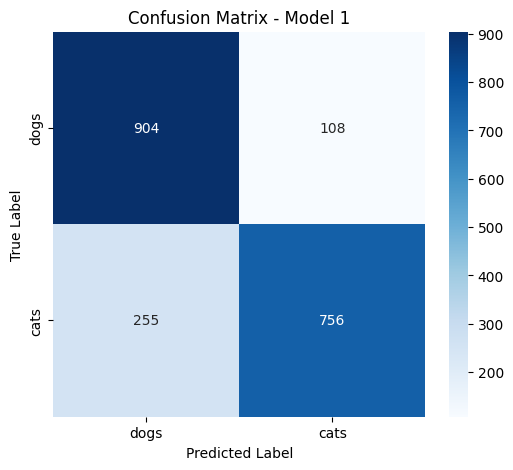


--- Generating Predictions for Model 2 ---
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Classification Report for Model 2:
              precision    recall  f1-score   support

        dogs       0.67      0.83      0.74      1012
        cats       0.78      0.60      0.67      1011

    accuracy                           0.71      2023
   macro avg       0.73      0.71      0.71      2023
weighted avg       0.73      0.71      0.71      2023


Confusion Matrix for Model 2:
[[841 171]
 [409 602]]


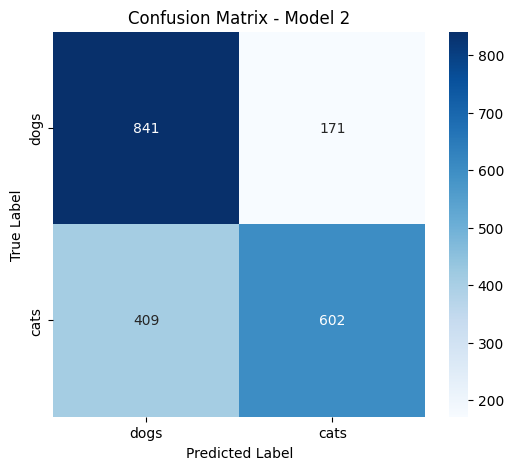

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- For Model 1 ---
print("\n--- Generating Predictions for Model 1 ---")
# Reset the test_set generator to ensure predictions start from the beginning
# This is crucial if you've already evaluated it or if it's exhausted.
test_set_m1.reset() # Reset the generator for model 1's test set
predictions_m1 = model_1.predict(test_set_m1)

# Sigmoid output gives probabilities, convert to binary class (0 or 1)
# You can adjust the threshold if needed (e.g., 0.5 is default for binary)
predicted_classes_m1 = (predictions_m1 > 0.5).astype(int).flatten()

# Get true labels from the generator
true_classes_m1 = test_set_m1.classes
class_labels = list(test_set_m1.class_indices.keys()) # Get class names (e.g., 'cats', 'dogs')

print("\nClassification Report for Model 1:")
print(classification_report(true_classes_m1, predicted_classes_m1, target_names=class_labels))

print("\nConfusion Matrix for Model 1:")
conf_matrix_m1 = confusion_matrix(true_classes_m1, predicted_classes_m1)
print(conf_matrix_m1)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_m1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Repeat for Model 2 ---
print("\n--- Generating Predictions for Model 2 ---")
test_set_m2.reset() # Reset the generator for model 2's test set
predictions_m2 = model_2.predict(test_set_m2)
predicted_classes_m2 = (predictions_m2 > 0.5).astype(int).flatten()
true_classes_m2 = test_set_m2.classes # Should be same as true_classes_m1, but good to be explicit

print("\nClassification Report for Model 2:")
print(classification_report(true_classes_m2, predicted_classes_m2, target_names=class_labels))

print("\nConfusion Matrix for Model 2:")
conf_matrix_m2 = confusion_matrix(true_classes_m2, predicted_classes_m2)
print(conf_matrix_m2)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_m2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Model 2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

the evaluation obviously shows the model 1 is performing better than model 2.
model 2 is not heay enough.

model 1 has a bias towards dogs as it can be seen by it's recall and precision scores.

Found 2023 images belonging to 2 classes.


2023/2023 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step

Found 363 misclassified images.


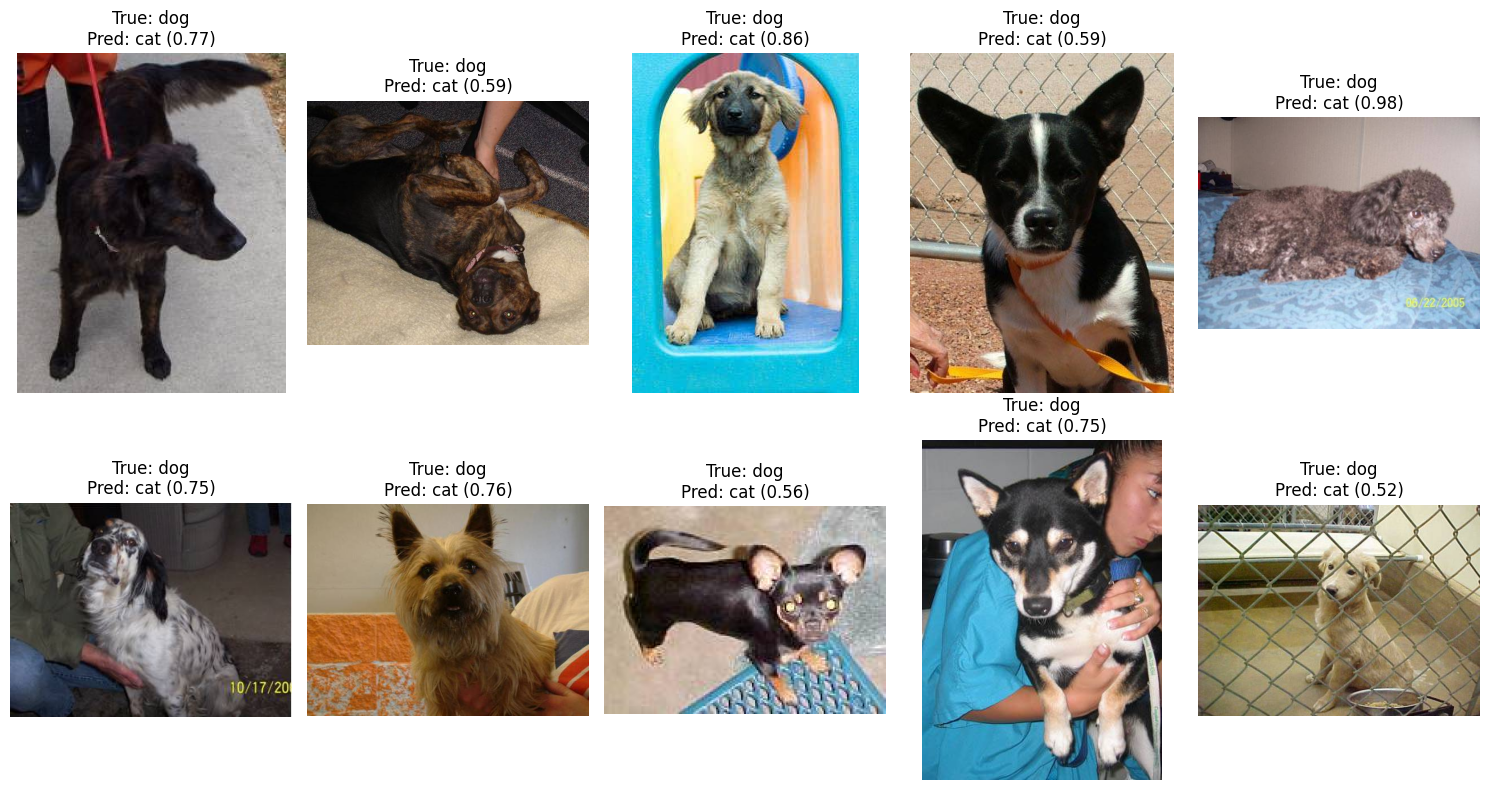

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure you have your test_set_m1 generator defined and ready from before
# For consistency, it's best to re-create it just for prediction and evaluation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_dir = '/Users/farzam/Desktop/IT/ml/practice/test_set/test_set'
test_datagen = ImageDataGenerator(rescale=1./255)

# IMPORTANT: Ensure the generator is NOT SHUFFLED for this analysis
test_set_m1_for_analysis = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(32,32),
    classes=['dogs', 'cats'],
    class_mode = 'binary',
    batch_size = 1, # Use batch_size=1 to easily match individual images/labels
    shuffle=False    # CRUCIAL: Do not shuffle for this analysis
)

# Get predictions and true labels
test_set_m1_for_analysis.reset() # Reset the generator
predictions = model_1.predict(test_set_m1_for_analysis, steps=test_set_m1_for_analysis.samples)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_set_m1_for_analysis.classes # True labels in order of files

# Get filenames in the same order as the generator processed them
filenames = [test_set_m1_for_analysis.filepaths[i] for i in test_set_m1_for_analysis.index_array]

# Identify misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

print(f"\nFound {len(misclassified_indices)} misclassified images.")

# Display a few misclassified images (e.g., first 10)
num_to_display = 10
plt.figure(figsize=(15, 8))
for i, idx in enumerate(misclassified_indices[:num_to_display]):
    filepath = filenames[idx]
    true_label = 'dog' if true_classes[idx] == 0 else 'cat'
    predicted_label = 'dog' if predicted_classes[idx] == 0 else 'cat'
    prediction_confidence = predictions[idx][0] if predicted_classes[idx] == 1 else 1 - predictions[idx][0] # Confidence in predicted class

    # Load and display the image (need to load from file path as generator yields batches)
    img = plt.imread(filepath)

    plt.subplot(2, 5, i + 1) # Adjust subplot grid if num_to_display changes significantly
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_label} ({prediction_confidence:.2f})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Optional: Identify specific patterns in these misclassified images
# For example, are they mostly one type of cat mistaken for a dog? Bad lighting?
# Are they images where the animal is partially obscured?

Found 2023 images belonging to 2 classes.
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step

Found 255 instances where True is CAT but Predicted is DOG.


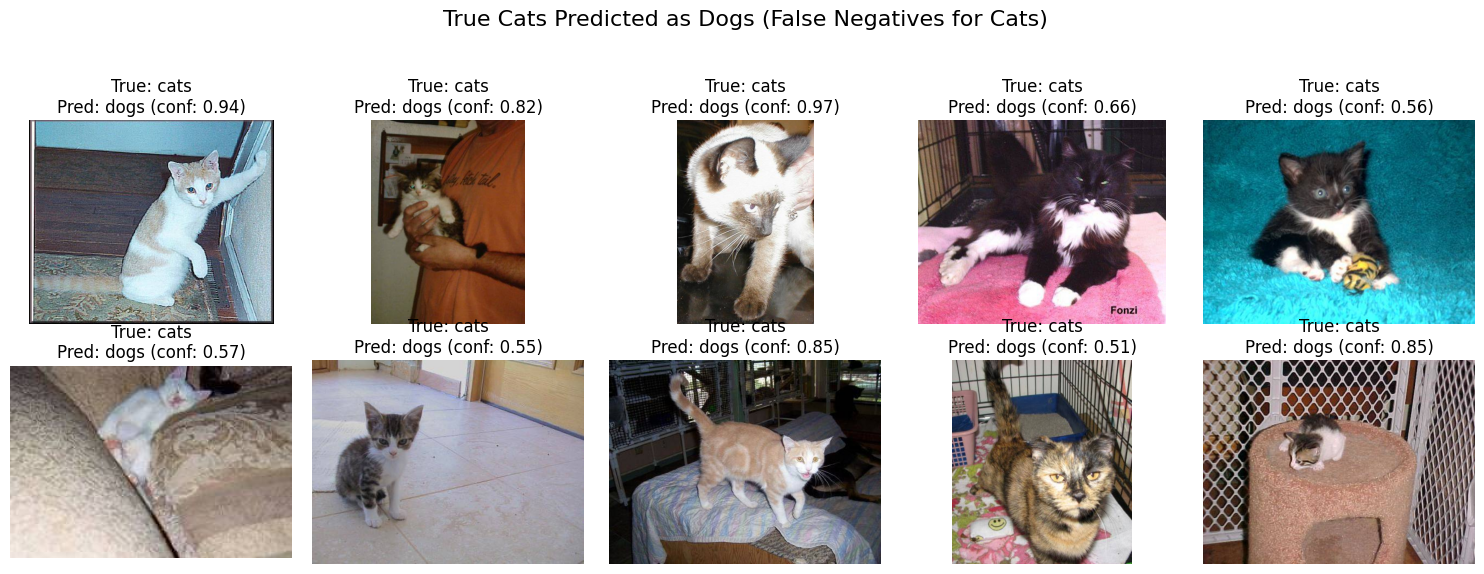

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming model_1 is already trained and loaded
# Re-create the generator for analysis to ensure consistency and prevent exhaustion
test_data_dir = '/Users/farzam/Desktop/IT/ml/practice/test_set/test_set'
test_datagen = ImageDataGenerator(rescale=1./255)

# IMPORTANT: Ensure the generator is NOT SHUFFLED for this analysis
# Use batch_size=1 to easily match individual images/labels for analysis
test_set_m1_for_analysis = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(32,32),
    classes=['dogs', 'cats'], # Make sure 'dogs' is 0, 'cats' is 1 as per your setup
    class_mode = 'binary',
    batch_size = 1,
    shuffle=False
)

# Get predictions and true labels
test_set_m1_for_analysis.reset() # Reset the generator before predicting
predictions = model_1.predict(test_set_m1_for_analysis, steps=test_set_m1_for_analysis.samples)
predicted_classes = (predictions > 0.5).astype(int).flatten() # Convert probabilities to 0 or 1
true_classes = test_set_m1_for_analysis.classes # True labels in order of files processed by generator

# Get filenames in the same order as the generator processed them
filenames = [test_set_m1_for_analysis.filepaths[i] for i in test_set_m1_for_analysis.index_array]

# Get the mapping from class index to class name
class_names = {v: k for k, v in test_set_m1_for_analysis.class_indices.items()}
# This will be {0: 'dogs', 1: 'cats'} if your folders are 'dogs' and 'cats' and they are sorted alphabetically.

# --- Correctly filter for TRUE CATS predicted as DOGS ---
# True class is 'cat' (which is 1 based on default flow_from_directory alphabetical sorting)
# Predicted class is 'dog' (which is 0)
cat_as_dog_indices = np.where((true_classes == 1) & (predicted_classes == 0))[0]

print(f"\nFound {len(cat_as_dog_indices)} instances where True is CAT but Predicted is DOG.")

# Display a few examples of these specific misclassified images
num_to_display = min(10, len(cat_as_dog_indices)) # Display up to 10, or fewer if not enough errors
if num_to_display > 0:
    plt.figure(figsize=(15, (num_to_display + 4) // 5 * 3)) # Dynamic figure height
    plt.suptitle("True Cats Predicted as Dogs (False Negatives for Cats)", fontsize=16)

    for i, idx in enumerate(cat_as_dog_indices[:num_to_display]):
        filepath = filenames[idx]
        true_label = class_names[true_classes[idx]]
        predicted_label = class_names[predicted_classes[idx]]
        
        # Confidence of the model's prediction for the *predicted* class
        # If predicted_classes[idx] is 0 (dog), confidence is 1 - predictions[idx][0]
        # If predicted_classes[idx] is 1 (cat), confidence is predictions[idx][0]
        confidence = predictions[idx][0] if predicted_classes[idx] == 1 else (1 - predictions[idx][0])

        # Load and display the image
        img = plt.imread(filepath)

        plt.subplot((num_to_display + 4) // 5, 5, i + 1) # Dynamically size subplot grid
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {predicted_label} (conf: {confidence:.2f})")
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()
else:
    print("No 'cat as dog' misclassifications found to display.")

In [60]:
# Assuming you have your training_set_m1 generator from the previous code block
# or re-create it if necessary
training_set_m1.reset() # Reset if it was used for training

class_counts_train = training_set_m1.samples
print(f"\nTotal training samples: {class_counts_train}")

# Get class distribution
class_indices_train = training_set_m1.class_indices
print(f"Class indices: {class_indices_train}") # e.g., {'dogs': 0, 'cats': 1}

# Calculate counts for each class
class_counts = {cls: np.sum(training_set_m1.classes == idx)
                for cls, idx in class_indices_train.items()}

print("\nTraining Class Distribution:")
for cls, count in class_counts.items():
    print(f"- {cls}: {count} images")

# Repeat for test set if you want to verify balance
test_set_m1.reset()
class_counts_test = test_set_m1.samples
class_indices_test = test_set_m1.class_indices
class_counts_test = {cls: np.sum(test_set_m1.classes == idx)
                     for cls, idx in class_indices_test.items()}
print("\nTest Class Distribution:")
for cls, count in class_counts_test.items():
    print(f"- {cls}: {count} images")


Total training samples: 8005
Class indices: {'dogs': 0, 'cats': 1}

Training Class Distribution:
- dogs: 4005 images
- cats: 4000 images

Test Class Distribution:
- dogs: 1012 images
- cats: 1011 images
